In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Путь к папке с файлами
folder_path = 'target'

# Список файлов в папке
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Проверка на наличие CSV файлов
if not files:
    print("В папке нет CSV файлов!")
else:
    print(f"Найдено {len(files)} CSV файлов в папке.")

    # Загрузка первого файла для инициализации
    merged_data = pd.read_csv(os.path.join(folder_path, files[0]))

    # Объединение остальных файлов по ключу ID
    for file in files[1:]:
        data = pd.read_csv(os.path.join(folder_path, file))

        # Добавляем префикс к столбцам перед объединением
        prefix = os.path.splitext(file)[0] + '_'
        data.columns = [prefix + col if col != 'ID' else col for col in data.columns]

        merged_data = pd.merge(merged_data, data, on='ID', how='outer')

Найдено 6 CSV файлов в папке.


In [11]:
df = merged_data

In [12]:
# Удаляем все столбцы, где есть 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

print(df.columns)

Index(['ID', 'Mean_per_1', 'Target_5_Mean_per_1', 'Target_4_Mean_per_1',
       'Target_1_Mean_per_1', 'Target_3_Mean_per_1', 'Target_2_Mean_per_1'],
      dtype='object')


In [14]:
df = df.drop('ID', axis=1)
df.head(10)

,Mean_per_1,Target_5_Mean_per_1,Target_4_Mean_per_1,Target_1_Mean_per_1,Target_3_Mean_per_1,Target_2_Mean_per_1
0,0.000000,0.000000,0.000000,2.210000,4.133333,1.557143
1,1.058333,1.058333,1.058333,0.811111,2.900000,2.871429
2,2.890000,2.890000,2.890000,0.636364,2.866667,2.500000
3,2.910000,2.910000,2.910000,2.150000,2.857143,1.814286
4,2.870000,2.870000,2.870000,0.580000,4.150000,2.528571
5,0.191667,0.191667,0.191667,1.750000,2.450000,2.014286
6,3.133333,3.133333,3.133333,2.133333,2.910000,1.492857
7,3.200000,3.200000,3.200000,1.000000,4.333333,2.500000
8,2.970000,2.970000,2.970000,2.154545,0.000000,1.814286
9,0.166667,0.166667,0.166667,0.940000,2.850000,2.514286


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   221 non-null    object 
 1   Mean_per_1           145 non-null    float64
 2   Target_5_Mean_per_1  210 non-null    float64
 3   Target_4_Mean_per_1  170 non-null    float64
 4   Target_1_Mean_per_1  109 non-null    float64
 5   Target_3_Mean_per_1  136 non-null    float64
 6   Target_2_Mean_per_1  57 non-null     float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


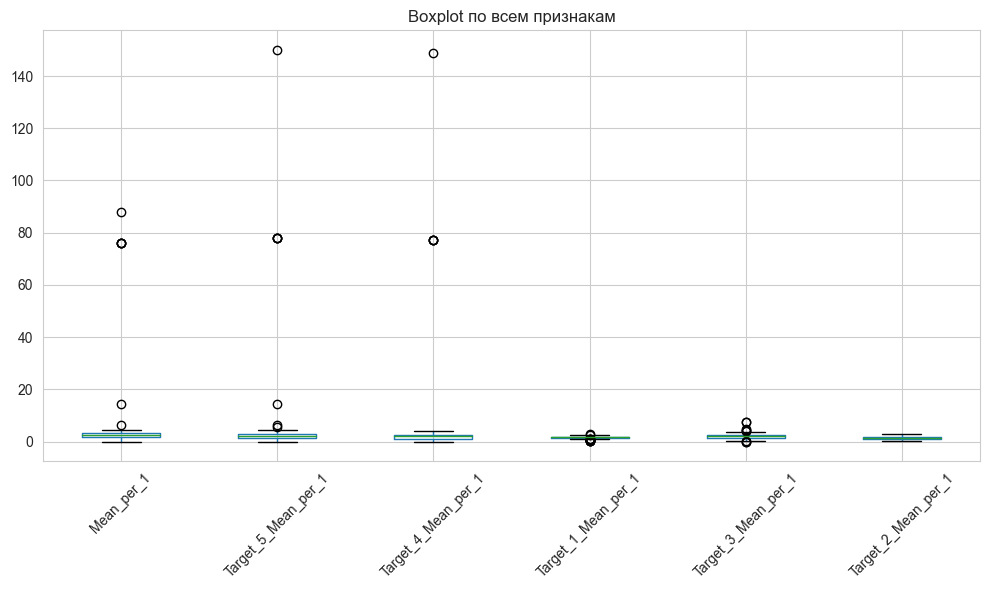

In [22]:
plt.figure(figsize=(10, 6))

df.boxplot()

plt.title('Boxplot по всем признакам')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

In [23]:
columns_to_process = df.columns.difference(['ID'])
df.loc[:, columns_to_process] = df.loc[:, columns_to_process].apply(lambda x: x.apply(lambda y: y if y <= 7 else None))

# Удалим все значения больше 7, так как средний надой для такого типа животных выше 5 уже можно считать аномальным

In [25]:
# Вычисление средних значений для каждого столбца, исключая 'ID'
means = df.drop('ID', axis=1).mean()

# Заполнение пропусков средними значениями
df = df.fillna(means)

In [26]:
target_columns = df.columns[df.columns != 'ID']

df['Target'] = df[target_columns].max(axis=1)

In [28]:
target_columns = df.columns[df.columns != 'ID']

df['Target'] = df[target_columns].max(axis=1)

result = df[['ID', 'Target']]

In [30]:
result.to_csv('Clean_data/Target.csv')